Pandas는 Panel Datas의 약자로써 파이썬을 이용한 데이터 분석에서  
가장 많이 사용되는 라이브러리.  
Numpy를 기반으로 만들어졌으며 데이터 분석을 위한 효율적인 데이터 구조(Matrix)를 제공한다.  

Pandas의 자료구조  
1. Series - 1차원 배열 형태 자료구조(vertor)
    > Series(ndarray, index) 
2. DataFrame - 2차원 배열 형태 자료구조(Matrix)  
    > 행을 구분하는 인덱스와 열을 구분하는 컬럼이 있다.  
    > 별도의 지정이 없으면 인덱스는 정수로 설정  
    > 한번 지정된 인덱스는 변경되지 않는다.      
3. Panel - 3차원

# Series

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

### 1. 시리즈 생성하고 구조 확인

In [ ]:
ser1 = Series?

In [3]:
# 처음에는 index 속성없이 생성해보겠다. data는 배열형태
# np배열 만드는 방법 1) array()    2) random
# index를 명시적으로 지정하지 않으면 자동적으로 0~N-1 까지의 정수로 지정된다.

np.random.seed(100)

# ser1 = Series(np.random.randint(10,20,5)) # 10~20사이의 정수 5개
# ser1 = Series(np.random.randint(10,20,5), index = ['a','b','c','d','e']) # 인덱스지정. 번거로움
ser1 = Series(np.random.randint(10,20,5), index=list('abcde')) # list() 함수 이용
print(ser1)
print(ser1.index)
print(ser1.values)
print(ser1.dtype)

a    18
b    18
c    13
d    17
e    17
dtype: int32
Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
[18 18 13 17 17]
int32


### 2. 시리즈 값 조회하기
- 인덱싱 | 슬라이싱  
- 단일값을 선택하거나 여러 값을 선택할때 인덱스로 숫자나 라벨을 사용할 수 있다.
- 이때 슬라이싱되는 방법이 달라진다.
    - 1) 라벨사용 - 마지막 라벨 포함
    - 2) 숫자사용 - 마지막 숫자 포함 안함

In [4]:
print(ser1['c']) # 인덱싱(라벨사용)
print(ser1[2])

print(ser1[1:4]) # 숫자를 이용한 슬라이싱 - 마지막 포함 X
print(ser1['b':'e']) # 라벨을 이용한 슬라이싱 - 마지막 포함 O

13
13
b    18
c    13
d    17
dtype: int32
b    18
c    13
d    17
e    17
dtype: int32


In [6]:
# 응용해서 조회하기
ser1_1 = ser1[::2] # 전체 조회에서 2 step
print(ser1_1)

ser1_2 = ser1[:2]
print(ser1_2) 

a    18
c    13
e    17
dtype: int32
a    18
b    18
dtype: int32


### 3. 시리즈 간의 연산과 누락 데이터 처리

In [24]:
print(ser1_1)
print(ser1)

# 시리즈간의 연산
result = ser1 + ser1_1
print(result) # b,d 에 해당하는 값들은 NaN으로 채워짐. NaN : 누락데이터 / 결측값
              # 연산 결과로 float64로 바뀜. NaN이 float64이기 때문에!!

a    18
c    13
e    17
dtype: int32
a    18
b    18
c    13
d    17
e    17
dtype: int32
a    36.0
b     NaN
c    26.0
d     NaN
e    34.0
dtype: float64


### 4. 누락 데이터만 조회하기
- isnull()  
- notnull()

In [25]:
result

a    36.0
b     NaN
c    26.0
d     NaN
e    34.0
dtype: float64

In [32]:
print(result.isnull()) # null인 값 조회
print('*'*30)
print(result.notnull()) # NotNull인 값 조회
print('*'*30)
print(result.isnull().sum()) # 누락 데이터 개수 
print('*'*30)
print(result[result.isnull()])
print('*'*30)
print(result[result.notnull()])

a    False
b     True
c    False
d     True
e    False
dtype: bool
******************************
a     True
b    False
c     True
d    False
e     True
dtype: bool
******************************
2
******************************
b   NaN
d   NaN
dtype: float64
******************************
a    36.0
c    26.0
e    34.0
dtype: float64


### 5. Matplot을 이용한 시각화

In [33]:
import matplotlib.pyplot as plt

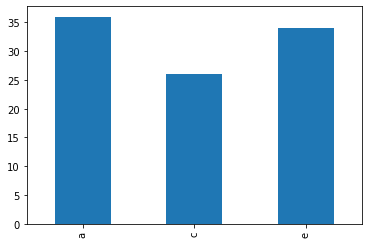

In [35]:
# 누락 데이터가 아닌 값들을 시각화해 본다.
result[result.notnull()].plot(kind='bar')
# result[result.isnull()].plot(kind='bar') # numeric한 것만이 그래프 대상
plt.show()